### Explain the reasons behind Dimension Reduction

It reduces the time and storage space required. It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D. It avoids the curse of dimensionality.

### Define multicollinearity

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

### Define PCA

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

### What is the difference between PCA and LDA?

LDA focuses on finding a feature subspace that maximizes the separability between the groups. While Principal component analysis is an unsupervised Dimensionality reduction technique, it ignores the class label. PCA focuses on capturing the direction of maximum variation in the data set.

### PCA

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [3]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

#### Is it necassary to standardize the data?

Standardized data is essential for accurate data analysis, different numerical variables have different range and variance, it's easier to draw clear conclusions about your current data when you have other data to measure it against.

In [4]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


#### How correlation is used for dimension reduction?

Correlation table shows the corrilations between each two variables. By viewing the coefficients, we're able to identify multicollinearity, and perform dimension reduction accordingly.

- If two variables are highly correlated, keeping only one will help reduce dimensionality without much loss of information.
- Which one to keep? The one that has a higher correlation coefficient with the target.

#### Do we always need to split our dataset into train and test? Should we do it when we want to perform PCA?

Splitting dataset into train and test set is needed when we need to test the performance of a model by using a test set which is not used in training the model. Therefore, splitting dataset is not always needed. When we perform PCA, we do not need split the dataset into train and test set, because there is no specific goal in a PCA algorithm. In other words, we do not have a actual label to test the performance.


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

In [6]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

#### If we use PC1 what percentage of dataset can we explain?

72.77% of the dataset can be explained if we use PC1.

The rest of 23.03% can be explained if you use PC2.

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])#, 'principal component 3'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [8]:
finalDf.corr()

,principal component 1,principal component 2
principal component 1,1.000000e+00,1.388177e-16
principal component 2,1.388177e-16,1.000000e+00


#### Is there a situation that correlation between PC1 and PC2 is more than 0.5?

According to the table above, correlation between PC1 and PC2 is less than 0.5.

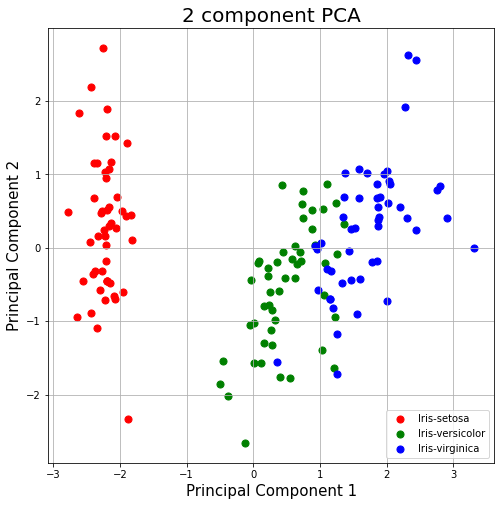

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### Can we use PCA for classification?

Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model, not develop the classification.

#### What are the three cases of regression response variables discussed.

- Numerical response variables
- Binomial response variables
- probability of binomial response variables

#### What kind of regression should we use when trying to predict a count response variable?


In spite of the skewness in the counts data and the OLSR model's propensity for generating negative and fractional counts, the OLSR model can be a viable regression model for counts based data sets. So, linear regression.

### Hands on Analysis

In [10]:
# load data
url = "https://raw.githubusercontent.com/ArashVafa/DESC624/master/cereals.CSV"
cereal = pd.read_csv(url)
cereal.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [11]:
# drop NaN
cereal.dropna(inplace=True)
cereal.reset_index(drop=True, inplace=True)

#### data standardization

In [12]:
# Standardizing the features
predictors = ['Fiber', 'Sugars', 'Potass']
for predictor in predictors:
  cereal[predictor + '_sd'] = StandardScaler().fit_transform(cereal[[predictor]])

# Correlation Table
sd_predictors = ['Fiber_sd', 'Sugars_sd', 'Potass_sd']
cereal[sd_predictors].corr()

,Fiber_sd,Sugars_sd,Potass_sd
Fiber_sd,1.000000,-0.150949,0.911504
Sugars_sd,-0.150949,1.000000,0.001414
Potass_sd,0.911504,0.001414,1.000000


Fiber and Potass are highly correlated.

#### linear regression

In [13]:
import statsmodels.api as sm
X = cereal[sd_predictors]
X = sm.add_constant(X)
y = cereal['Rating']
lr = sm.OLS(y, X).fit()
lr.summary()

/Users/sean/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           1.32e-26
Time:                        23:21:22   Log-Likelihood:                -235.05
No. Observations:                  74   AIC:                             478.1
Df Residuals:                      70   BIC:                             487.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3718      0.693     61.147      0.000      40.990      43.754
Fiber_sd      10.4311      1.814      5.751      0.000       6.814      14.048
Sugars_sd     -8.9571      0.746    -12.008      0.000     -10.445      -7.469
Potass_sd     -3.6999      1.793     -2.064      0.043      -7.276      -0.124
==============================================================================
Omnibus:                        6.769   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.395
Skew:                           0.714   Prob(JB):                       0.0409
Kurtosis:                       3.188   Cond. No.                         5.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### PCA

In [14]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(cereal[sd_predictors])
pca.explained_variance_ratio_

array([0.64123043, 0.33348527, 0.0252843 ])

- 64.12% of the dataset can be explained by 1 principal componet
- 33.35% can be explained by adding the 2nd principal componet
- 2.53% can be explained by adding the 3rd principal componet

To explain at least 70% of the variability, I will retain 2 components.

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cereal[sd_predictors])
pca.explained_variance_ratio_.sum()

0.9747157039240726

97.47% of the dataset can be explained by using 2 principal components.

#### Linear Regression using PCA

In [16]:
# PC result DataFrame
X = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
X = sm.add_constant(X)
y = cereal['Rating']

# LR model
lr = sm.OLS(y, X).fit()
lr.summary()

/Users/sean/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           3.11e-25
Time:                        23:25:06   Log-Likelihood:                -241.15
No. Observations:                  74   AIC:                             488.3
Df Residuals:                      71   BIC:                             495.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3718      0.747     56.709      0.000      40.882      43.862
PC1            5.8210      0.539     10.806      0.000       4.747       6.895
PC2           -9.4564      0.747    -12.659      0.000     -10.946      -7.967
==============================================================================
Omnibus:                        5.476   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.553
Skew:                           0.653   Prob(JB):                       0.0623
Kurtosis:                       2.691   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the summary table above, the coefficient of PC1 is 5.8210, and the coefficient of PC2 is -9.4564